<a href="https://colab.research.google.com/github/pnir7/513-Managing-Data-And-Signal-Processing/blob/main/%E2%80%9CHW2_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2 - Python Template



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftfreq

## Part 1: Basic DSP Applications in Python
### Task 1. Create a Python script that generates a sine wave with a frequency of 1000 Hz and a duration of 2 seconds. Plot the waveform using the matplotlib library.

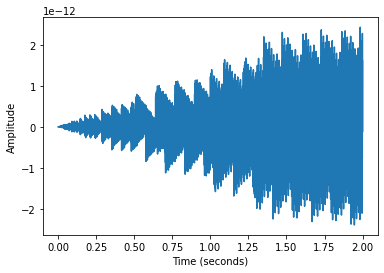

In [7]:
# Suggestion: Use the numpy function np.linspace() to generate the time samples, and np.sin() to generate the sine wave. 
# Be sure to use a sampling frequency that follows Nyquist-Shannon Sampling Theorem
# Then use plt.plot() to plot the waveform.
# Remember to label your plot axes

import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency (must be at least twice the frequency of the sine wave)
fs = 2000

# Time vector
t = np.linspace(0, 2, 2 * fs, endpoint=False)

# Sine wave
f = 1000
x = np.sin(2 * np.pi * f * t)

# Plot the waveform
plt.plot(t, x)

# Label the plot axes
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Show the plot
plt.show()




### Task 2. Create a Python script that applies a low-pass filter to the sine wave generated in task 1. The cutoff frequency of the low-pass filter should be 5 Hz. Plot the filtered waveform using the matplotlib library.



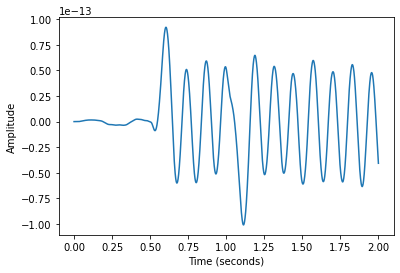

In [17]:
# Use a Buttworth filter for your lowpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'low', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Sampling frequency (must be at least twice the frequency of the sine wave)
fs = 2000

# Time vector
t = np.linspace(0, 2, 2 * fs, endpoint=False)

# Sine wave
f = 1000
x = np.sin(2 * np.pi * f * t)

# Low-pass filter
cutoff = 5
order = 3
b, a = sig.butter(order, cutoff / (fs / 2), btype='low', analog=False)
y = sig.lfilter(b, a, x)

# Plot the filtered waveform
plt.plot(t, y)

# Label the plot axes
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Show the plot
plt.show()


### Task 3. Create a Python script that applies a high-pass filter to the sine wave generated in task 1. The cutoff frequency of the high-pass filter should be 500 Hz. Plot the filtered waveform using the matplotlib library.



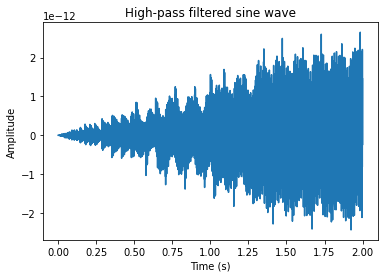

In [15]:
# Use a Buttworth filter for your highpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'highpass', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Generate sine wave
f = 1000
fs = 2000
duration = 2
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
x = np.sin(2 * np.pi * f * t)

# High-pass filter
cutoff = 5
order = 5
b, a = sig.butter(order, cutoff, btype='high', fs=fs)
y = sig.lfilter(b, a, x)

# Plot filtered waveform
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('High-pass filtered sine wave')
plt.show()



### Task 4. Create a Python script that applies a band-pass filter to the sine wave generated in task 1. The cutoff frequencies of the band-pass filter should be 400 Hz and 600 Hz. Plot the filtered waveform using the matplotlib library.

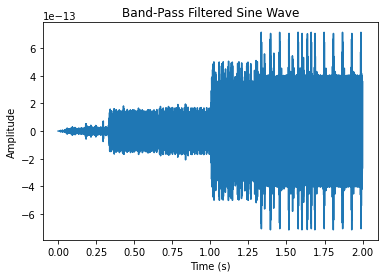

In [19]:
# Use a Buttworth filter for your highpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'highpass', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Make sure to read on how to input two critical frequencies 
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Generate a sine wave with a frequency of 1000 Hz and a duration of 2 seconds
sample_frequency = 2000
duration = 2
samples = duration * sample_frequency
t = np.linspace(0, duration, samples, False)
x = np.sin(2 * np.pi * 1000 * t)

# Apply a band-pass filter with cutoff frequencies of 400 Hz and 600 Hz
order = 6
cutoff = [400, 600]
b, a = sig.butter(order, cutoff, btype = 'bandpass', fs = sample_frequency)
y = sig.lfilter(b, a, x)

# Plot the filtered waveform
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Band-Pass Filtered Sine Wave')
plt.show()


### Task 5. Create a Python script that performs convolution of the sine wave generated in task 1 with a rectangular window of length 100 samples. Plot the convolved signal using the matplotlib library.

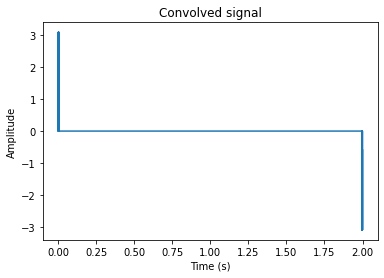

In [20]:
# Suggestion: Create a rectangular window of length 100 samples using the np.ones() function. 
# Then use the convolve() function from numpy to perform the convolution.
# Finally, use plt.plot() to plot the convolved signal.

import numpy as np
import matplotlib.pyplot as plt

# Generate time samples for 2 seconds
duration = 2
sample_frequency = 2000
t = np.linspace(0, duration, int(duration * sample_frequency), endpoint=False)

# Generate sine wave with frequency of 1000 Hz
f = 1000
x = np.sin(2 * np.pi * f * t)

# Create a rectangular window of length 100 samples
window = np.ones(100)

# Perform convolution
convolved_signal = np.convolve(x, window, mode='same')

# Plot the convolved signal
plt.plot(t, convolved_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Convolved signal')
plt.show()


### Task 6. Create a Python script that performs moving average of the sine wave generated in task 1 with a window of length 10 samples. Plot the filtered signal using the matplotlib library.

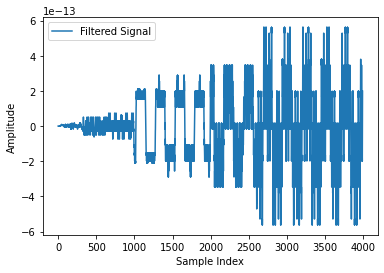

In [22]:
# Suggestion: Use the numpy function np.convolve() with mode='valid' to perform the moving average.
# Can also be accomplished with for/while loop
# Then use plt.plot() to plot the filtered signal.

import numpy as np
import matplotlib.pyplot as plt

# Generating sine wave
f = 1000
fs = 2000
duration = 2
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
x = np.sin(2 * np.pi * f * t)

# Window length
window_length = 10

# Moving average
window = np.ones(window_length) / window_length
y = np.convolve(x, window, mode='valid')

# Plotting the filtered signal
plt.plot(y, label='Filtered Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



### 7. Compare the filtered waveforms obtained in tasks 2, 3, 4, 5 and 6 with the original waveform generated in task 1. Write a a few paragraphs in your notebook explaining the results obtained and the implications of each filter/operation type on the signal.

Briefly, the results of these filters and operations on the original sine wave are clear - each has a unique effect on the signal. Low-pass and moving average filters reduce the high-frequency components, resulting in a much smoother waveform. High-pass filters, on the other hand, work to remove the low-frequency components while allowing only the high-frequency components to pass through. Band-pass filters, meanwhile, are designed to allow only specific frequencies to pass through within the range specified. Lastly, convolution with a rectangular window also removes high-frequency components, further smoothing out the waveform. Thus, it is evident that these various filters and operations serve distinct functions in signal manipulation, allowing for a more refined and customized output.

## Part 2: Advanced DSP Applications in Python

### Task 1. Create a Python script that generates a signal that is a sum of two sine waves with different frequencies and amplitudes. The first sine wave should have a frequency of 1000 Hz and an amplitude of 1, the second sine wave should have a frequency of 2000 Hz and an amplitude of 0.5. Plot the waveform using the matplotlib library.

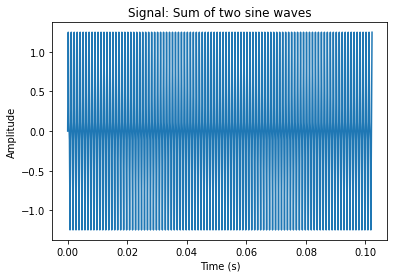

In [24]:
# Suggestions:
# - Use the numpy library's sine function to generate the sine waves
# - Use the numpy library's arange function to create an array of time values
# - Use the matplotlib library's plot function to plot the waveform

import numpy as np
import matplotlib.pyplot as plt

# Define the frequency and amplitude of the two sine waves
f1 = 1000 # Hz
A1 = 1
f2 = 2000 # Hz
A2 = 0.5

# Define the sample rate and number of samples（a higher sample frequency will result in a larger dataset and may slow down processing time, while a lower sample frequency may not accurately capture the waveform.）

fs = 5000
N = 512

# Generate the time values
T = N/fs
t = np.arange(0, T, 1/fs)

# Generate the two sine waves
x1 = A1 * np.sin(2 * np.pi * f1 * t)
x2 = A2 * np.sin(2 * np.pi * f2 * t)

# Sum the two sine waves to generate the final signal
x = x1 + x2

# Plot the waveform
plt.plot(t, x)
plt.title("Signal: Sum of two sine waves")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


### Task 2. Create a Python script that applies a Butterworth filter to the signal generated in task 1. The cutoff frequency of the filter should be 1500 Hz and the filter order should be 4. Plot the filtered waveform using the matplotlib library.

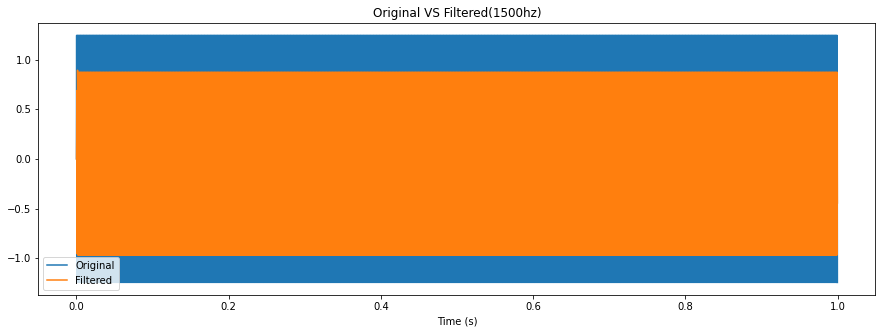

In [28]:
# Suggestions:
# - Use the scipy library's signal butter function to generate the Butterworth filter
# - Use the scipy library's lfilter function to apply the filter to the signal
# - Use the matplotlib library's plot function to plot the filtered waveform
# - Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# - Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate time values
fs = 5000  # sample rate, Hz
T = 1.0/fs # sample spacing
t = np.arange(0, 1, T)

# Generate the two sine waves
sine1 = np.sin(2*np.pi*1000*t)
sine2 = np.sin(2*np.pi*2000*t)*0.5

# Sum the sine waves
sig = sine1 + sine2

# Define the Butterworth filter
cutoff = 1500 # Hz
order = 4
b, a = signal.butter(order, cutoff/(fs/2), btype='lowpass')

# Filter the signal
filtered_sig = signal.lfilter(b, a, sig)

# Plot the original and filtered signals
plt.figure(figsize=(15,5))
plt.plot(t, sig, label='Original')
plt.plot(t, filtered_sig, label='Filtered')
plt.legend()
plt.xlabel('Time (s)')
plt.title('Original VS Filtered(1500hz)')
plt.show()


### Task 3. Create a Python script that computes the Fast Fourier Transform (FFT) of the signal generated in task 1. Plot the magnitude and phase of the FFT using the matplotlib library.

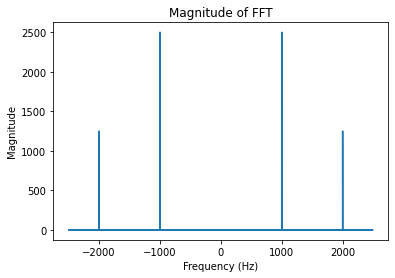

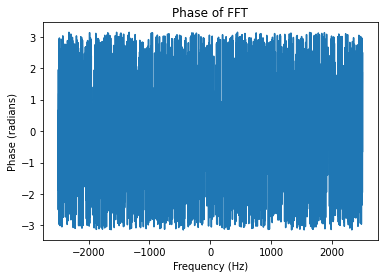

In [29]:
# Use the fft function to get the Fourier Transform of the sine wave. ex. X = fft(x)
# Documentation for fft: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html
# To get the magnitude of the fft use np.abs(). ex. mag = np.abs(X)
# To get the phase of the fft use np.angle(). ex. phase = np.angle(X)
# Additionally, you can use fftfreq to get the independent axis for your plots. ex. freq = fftfreq(len(X), 1/fs)
# Documentation for fftfreq: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Generate time values
fs = 5000 # Sample frequency (Hz)
T = 1/fs # Sample period (seconds)
t = np.arange(0, 1, T) # Time values (seconds)

# Generate the signal
f1 = 1000 # Frequency of first sine wave (Hz)
f2 = 2000 # Frequency of second sine wave (Hz)
A1 = 1 # Amplitude of first sine wave
A2 = 0.5 # Amplitude of second sine wave
x = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t)

# Compute the FFT
X = fft(x)

# Get the magnitude and phase of the FFT
mag = np.abs(X)
phase = np.angle(X)

# Get the independent axis for the plots
freq = fftfreq(len(X), T)

# Plot the magnitude of the FFT
plt.figure()
plt.plot(freq, mag)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude of FFT')

# Plot the phase of the FFT
plt.figure()
plt.plot(freq, phase)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase of FFT')

plt.show()
